In [433]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

In [317]:
df = pd.read_csv("s3://german-credit-22/Datos/original/german_credit_data.csv")

In [318]:
df

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  Risk  
0             1169         6             radio/TV  good  
1             5951        48             radio/TV   bad  
2             2096        12            education  good  
3             7882        42  furniture/equipment  good  
4             4870        24                  car   bad  
..             ...       ...                  ...   ...  
995           1736        12  furniture/equipment  good  
996           3857        30                  car  good  
997            804        12             radio/TV  good  
998           1845        45             radio/TV   bad  
999           4576        45                  car  good  

[1000 rows x 11 columns]

In [319]:
df.describe()

Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [321]:
df["Risk"].value_counts()/df["Risk"].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [322]:
train, test = train_test_split(df, test_size=0.3, random_state=42, stratify=df["Risk"])

In [323]:
train["Risk"].value_counts()/train["Risk"].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [324]:
test["Risk"].value_counts()/test["Risk"].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [325]:
train.to_csv("s3://german-credit-22/Datos/train/train.csv", index=False)

In [326]:
test.to_csv("s3://german-credit-22/Datos/test/test.csv", index=False)

## Exploracion de Dataset 

In [327]:
#pandas.get_dummies(train, prefix=None, prefix_sep=’_’, dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Job'}>,
        <AxesSubplot:title={'center':'Credit amount'}>],
       [<AxesSubplot:title={'center':'Duration'}>, <AxesSubplot:>]],
      dtype=object)

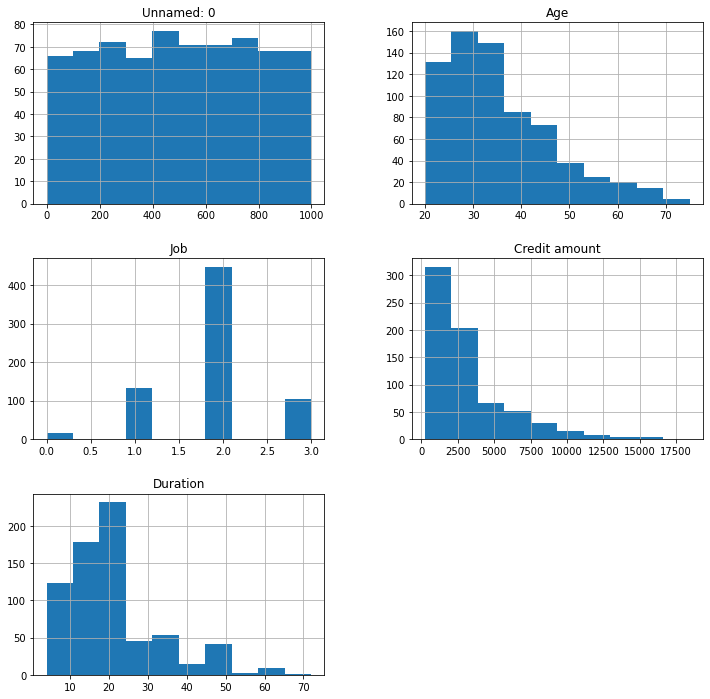

In [328]:
train.hist(figsize=(12, 12))

In [329]:
corr = train.corr()

<AxesSubplot:>

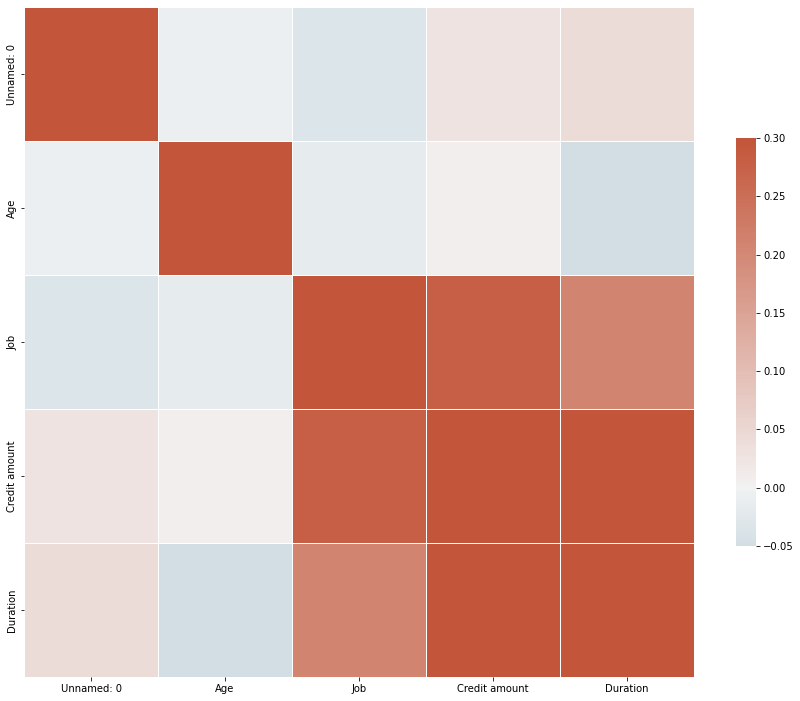

In [330]:
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [331]:
pd.crosstab(train["Housing"], train["Risk"], margins=True)

Risk     bad  good  All
Housing                
free      29    45   74
own      133   371  504
rent      48    74  122
All      210   490  700

In [332]:
tabla_sex = pd.crosstab(train["Sex"], train["Risk"], margins=True)
tabla_sex["probability"] = tabla_sex.iloc[:,1]/tabla_sex.iloc[:, 2]

In [333]:
tabla_sex

Risk    bad  good  All  probability
Sex                                
female   76   138  214      0.64486
male    134   352  486      0.72428
All     210   490  700      0.70000

## Preprocesamiento

In [334]:
from sklearn.impute import SimpleImputer

In [394]:
X_train = train[["Age", "Credit amount", "Duration"]]

In [336]:
imputer = SimpleImputer(strategy='mean')

In [337]:
imputer.fit(X_train)

SimpleImputer()

In [338]:
imputer.statistics_

array([  35.40285714, 3236.12142857,   21.04857143])

In [339]:
imputer.transform([[24, 1000, np.nan],
                   [np.nan, np.nan, 12]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[  24.        , 1000.        ,   21.04857143],
       [  35.40285714, 3236.12142857,   12.        ]])

In [340]:
imputer.fit_transform(X_train)

array([[3.100e+01, 4.473e+03, 3.600e+01],
       [4.600e+01, 1.829e+03, 1.500e+01],
       [2.700e+01, 7.418e+03, 6.000e+01],
       ...,
       [6.300e+01, 1.655e+03, 1.200e+01],
       [4.900e+01, 2.096e+03, 1.200e+01],
       [3.700e+01, 3.676e+03, 6.000e+00]])

In [341]:
X_train = train[["Saving accounts", "Checking account"]]

In [342]:
imputer = SimpleImputer(strategy='most_frequent')

In [343]:
#imputer.statistics_

In [344]:
X_train = pd.DataFrame(imputer.fit_transform(X_train))

In [345]:
X_train

0         1
0      little      rich
1      little    little
2      little  moderate
3      little    little
4    moderate    little
..        ...       ...
695    little  moderate
696    little  moderate
697    little    little
698    little    little
699    little    little

[700 rows x 2 columns]

## Ejemplo KNN Imputer

In [346]:
from sklearn.impute import KNNImputer
import math

In [347]:
df = pd.DataFrame([[40, 19, 3.0],
      [42, 20, 3.1],
      [44, 21, None],
      [45, 23, 4.1],
      [39, 25, 5.0],
      [80, 27, None],
      [82, 30, 4.8]      
     ], columns=["Peso", "Edad", "Nota"])

In [348]:
df

Peso  Edad  Nota
0    40    19   3.0
1    42    20   3.1
2    44    21   NaN
3    45    23   4.1
4    39    25   5.0
5    80    27   NaN
6    82    30   4.8

In [349]:
imputer = KNNImputer(n_neighbors=1)

In [350]:
result = imputer.fit_transform(df)

In [351]:
result

array([[40. , 19. ,  3. ],
       [42. , 20. ,  3.1],
       [44. , 21. ,  4.1],
       [45. , 23. ,  4.1],
       [39. , 25. ,  5. ],
       [80. , 27. ,  4.8],
       [82. , 30. ,  4.8]])

In [352]:
def euclidean_distance(features_x, features_y):
    suma = 0
    for x, y in zip(features_x, features_y):
        suma += (x-y)**2
    return math.sqrt(suma)

## Escalado

### Escalado Estandar

In [383]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [354]:
train[["Age"]]

Age
328   31
891   46
255   27
243   27
492   27
..   ...
73    41
401   28
769   63
2     49
617   37

[700 rows x 1 columns]

In [355]:
scaler = StandardScaler()

In [356]:
scaler.fit(train[["Age"]])

StandardScaler()

In [357]:
scaler.mean_

array([35.40285714])

In [358]:
scaler.var_**0.5

array([11.23479253])

In [359]:
age_scaled = scaler.transform(train[["Age"]])

In [360]:
age_scaled[:5]

array([[-0.39189483],
       [ 0.94324331],
       [-0.74793167],
       [-0.74793167],
       [-0.74793167]])

In [361]:
age_scaled.min()

-1.3709961351990447

In [362]:
age_scaled.max()

3.524510376131248

In [363]:
(train["Age"].iloc[0]-scaler.mean_) / (scaler.var_ ** 0.5)

array([-0.39189483])

In [364]:
scaler.inverse_transform([age_scaled[0]])

array([[31.]])

In [365]:
q1 = train["Age"].quantile(0.25)
q3 = train["Age"].quantile(0.75)
iqr = q3 - q1
median = train["Age"].median()

In [366]:
iqr

14.25

In [367]:
median

33.0

## Robust Scaler (manual)

In [368]:
def robust_scaler(x, median, iqr):
    result = x - median / iqr
    return result

In [369]:
age_robust_scaled = [robust_scaler(x, median, iqr) for x in train["Age"]]

## Valores Categóricos

In [370]:
from sklearn.preprocessing import OneHotEncoder

In [376]:
encoder = OneHotEncoder(sparse=True, drop='first')
encoder.fit_transform(train[["Sex"]])

<700x1 sparse matrix of type '<class 'numpy.float64'>'
	with 486 stored elements in Compressed Sparse Row format>

In [377]:
encoder.categories_

[array(['female', 'male'], dtype=object)]

In [379]:
encoder.inverse_transform([[0]])

array([['female']], dtype=object)

# Pipeline

In [380]:
from sklearn.pipeline import Pipeline

## Pipeline Numerico

In [384]:
numeric_pipeline = Pipeline(
    [
        ('Imputación con la media', SimpleImputer(strategy='mean')),
        ('Escalado minmax', MinMaxScaler())
    ]
)

In [385]:
numeric_pipeline.fit(train[['Age', 'Credit amount', 'Duration']])

Pipeline(steps=[('Imputación con la media', SimpleImputer()),
                ('Escalado minmax', MinMaxScaler())])

In [397]:
numeric_pipeline.transform(X_train)

array([[0.2       , 0.23236492, 0.47058824],
       [0.47272727, 0.08688236, 0.16176471],
       [0.12727273, 0.3944096 , 0.82352941],
       ...,
       [0.78181818, 0.07730824, 0.11764706],
       [0.52727273, 0.10157368, 0.11764706],
       [0.30909091, 0.18851106, 0.02941176]])

In [401]:
numeric_pipeline.transform([[np.nan, np.nan, np.nan]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[0.28005195, 0.16430733, 0.25071429]])

## Pipeline Categorico

"Sex", "Purpose", "Housing" Imputacion con Moda y OneHotEncoder

In [412]:
categorical_pipeline = Pipeline(
    [
        ("Imputacion con la Moda", SimpleImputer(strategy='most_frequent')),
        ("Codificación OneHot", OneHotEncoder(sparse=False))
    ]
)

In [413]:
X_train_cateogorics = train[['Sex', 'Purpose', 'Housing']]

In [416]:
categorical_pipeline.fit(X_train_cateogorics)

Pipeline(steps=[('Imputacion con la Moda',
                 SimpleImputer(strategy='most_frequent')),
                ('Codificación OneHot', OneHotEncoder(sparse=False))])

In [420]:
encoded_x_train = categorical_pipeline.transform(X_train_cateogorics)

In [421]:
categorical_pipeline[1].categories_

[array(['female', 'male'], dtype=object),
 array(['business', 'car', 'domestic appliances', 'education',
        'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'],
       dtype=object),
 array(['free', 'own', 'rent'], dtype=object)]

In [423]:
encoded_x_train[0]

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.])

## Column Transformer

In [427]:
from sklearn.compose import ColumnTransformer

In [428]:
X_train_combined = train[['Age', 'Credit amount', 'Duration', 'Sex', 'Purpose', 'Housing']]

In [429]:
column_transformer = ColumnTransformer(
    [
        ("numeric_pipeline", numeric_pipeline, [0,1,2]),
        ("categorical_pipeline", categorical_pipeline, [3,4,5])
    ]
)

In [431]:
column_transformer.fit(X_train_combined)

ColumnTransformer(transformers=[('numeric_pipeline',
                                 Pipeline(steps=[('Imputación con la media',
                                                  SimpleImputer()),
                                                 ('Escalado minmax',
                                                  MinMaxScaler())]),
                                 [0, 1, 2]),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('Imputacion con la Moda',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Codificación OneHot',
                                                  OneHotEncoder(sparse=False))]),
                                 [3, 4, 5])])

In [432]:
column_transformer.transform(X_train_combined)

array([[0.2       , 0.23236492, 0.47058824, ..., 0.        , 1.        ,
        0.        ],
       [0.47272727, 0.08688236, 0.16176471, ..., 0.        , 1.        ,
        0.        ],
       [0.12727273, 0.3944096 , 0.82352941, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.78181818, 0.07730824, 0.11764706, ..., 0.        , 1.        ,
        0.        ],
       [0.52727273, 0.10157368, 0.11764706, ..., 0.        , 1.        ,
        0.        ],
       [0.30909091, 0.18851106, 0.02941176, ..., 0.        , 0.        ,
        1.        ]])

# Exportar el transformer para producción

In [434]:
joblib.dump(column_transformer, 'preprocessing.joblib')

['preprocessing.joblib']